# Data visualisation task 

**Additional information**  
[Cars93 metadata](https://jse.amstat.org/v1n1/datasets.lock.html) 

In [134]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
# Load data
df = pd.read_csv("Cars93.csv", index_col = 0, keep_default_na=False)
df.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [136]:
# Check for missing data
print(df.isnull().sum())

Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64


### 1. Boxplot

In [137]:
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30,15,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28,14,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31,17,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27,13,3640,non-USA,BMW 535i


In [138]:
print("Dataset shape: ", df.shape) # (n_observations, n_variables)
print("Features: ", df.columns[:-1])
print("Target variable: ", df.columns[-1])

Dataset shape:  (93, 27)
Features:  Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin'],
      dtype='object')
Target variable:  Make


<Axes: xlabel='Manufacturer', ylabel='Rev.per.mile'>

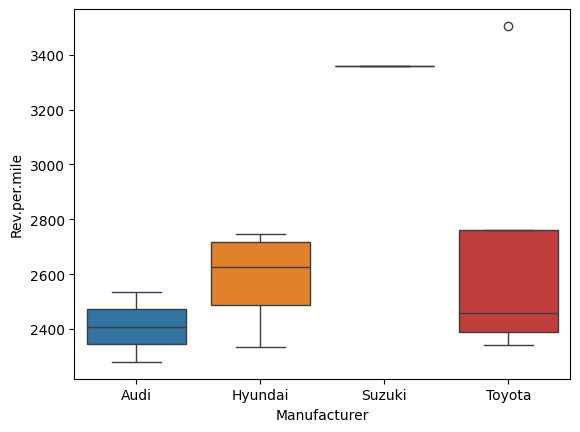

In [139]:
# Create a new dataframe to isolate just the data needed for the boxplot,
rpm_data = df[df['Manufacturer'].isin(['Audi', 'Hyundai', 'Suzuki', 'Toyota'])]

sns.boxplot(data = rpm_data, x = 'Manufacturer', y = 'Rev.per.mile', hue = 'Manufacturer')


**Boxplot question:**  
Which of these manufacturers has the car with the highest revs per mile?


**Boxplot answer:**


Although Suzuki's boxplot range appears to be the highest rev per mile, it appears there is an outlier in Toyota's data with the highest revs per mile of all. It could be worth investigating whether there has been an error in the data.

ANSWER: Toyota

### 2. Histogram

Text(0.5, 0, 'MPG')

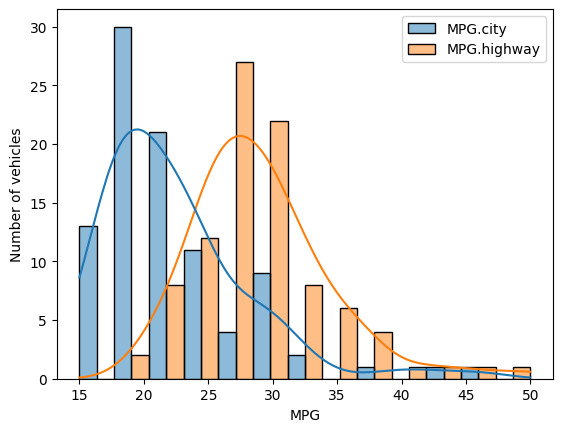

In [140]:
# Histogram of MPG
data_mpg = df[['MPG.city', 'MPG.highway']]
sns.histplot(data = data_mpg, multiple = 'dodge', kde = True)
plt.ylabel("Number of vehicles")
plt.xlabel("MPG")

**Histogram question:**  
Is it generally more fuel efficient to drive in the city or on the highway?

**Histogram answer:**

It is more efficient to drive on the highway. Although the data shows a skew towards lower MPG for both, highway is relatively higher.

### 3. Lineplot

<Axes: xlabel='Wheelbase', ylabel='Turn.circle'>

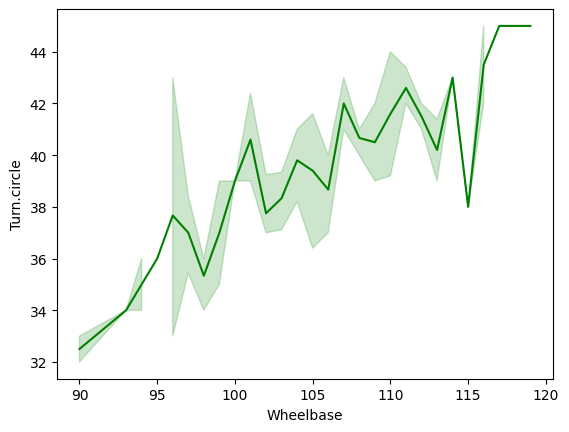

In [141]:
# Lineplot (Wheelbase vs turning circle)
wheel_turn = df[['Wheelbase', 'Turn.circle']]
sns.lineplot(data = wheel_turn, x = 'Wheelbase', y = 'Turn.circle', color = 'g')

**Lineplot question:**  
What is this relationship? What happens when the wheelbase gets larger?


**Lineplot answer:**  


The data shows a positive correlation between wheelbase and turning cicrle. An increase in wheelbase results in a larger turning circle.

### 4. Barplot

<Axes: xlabel='Type', ylabel='Horsepower'>

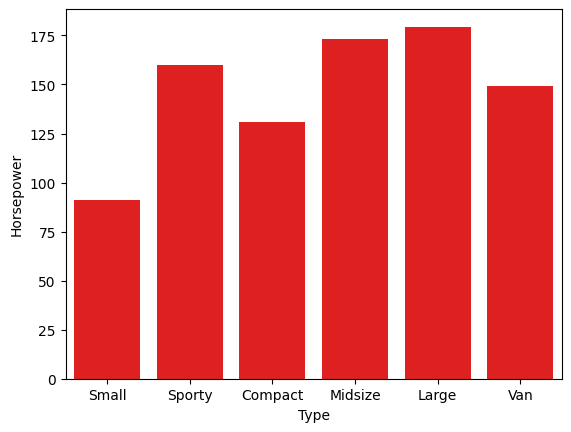

In [143]:
# Barplot for mean horsepower

hp_data = df[['Type', 'Horsepower', 'Weight']]      # Weight has been included to sort by
mean_hp = hp_data.groupby(['Type']).mean().sort_values(by=['Weight'])

sns.barplot(data = mean_hp, x = 'Type', y = 'Horsepower', color = 'r')


**Barplot question:**  
Does a larger car mean more horsepower?



**Barplot answer:**

Not necessarily, it depends on how "larger car" is defined. I have used vehicle weight to sort the data, it shows that "Sporty" cars have greater HP and "Vans" have lower HP than might be expected for their weight